# <font color=pink> Neural Network

<font color=pink> **The objective of this project is twofold: to delve into the study of the Keras library while advancing further in the exploration of Jupyter Notebook and Python. The project encompasses a major dataset (Iris Dataset)** <font>

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

4- Each dataset will have a summary of its meaning.

# About

We will delve into and explore a flower database. This database comprises four input features:

1. Petal length and width
2. Sepal length and width

We will examine and classify, based on these inputs, whether the Iris flower belongs to one of the following types:

1. Versicolor
2. Setosa
3. Virginica

These are the three classifications. We will tackle this multi-class problem by employing Neural Networks. Our aim is to construct a neural network capable of classifying our Iris dataset.

Info about the flower:

![](https://kedro.readthedocs.io/en/0.17.5/_images/iris_measurements.png)

Different types of flowers:

![](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

In [24]:
# !pip install tensorflow
# !pip install pydot

# Imports

from tensorflow import keras
import pydot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# SKlearn Imports

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Understanding Functionalities From Keras

In [2]:
# Creating Model

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[2], name='Neuron')])

C:\Users\Michels\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Checking basic infos

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Neuron (Dense)                  │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# checking layers information

weights, bias = model.layers[0].get_weights()
print(weights.shape, bias.shape)
weights, bias

(2, 1) (1,)


(array([[-1.05924   ],
        [-0.03275287]], dtype=float32),
 array([0.], dtype=float32))

In [5]:
# Placing new parameters

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[2], name='Neuron',
                                            kernel_initializer= keras.initializers.RandomNormal(),
                                            bias_initializer= keras.initializers.Ones()
                                            )])
model.layers[0].get_weights()

[array([[-0.07913749],
        [ 0.00870417]], dtype=float32),
 array([1.], dtype=float32)]

# Applying to Iris Dataset

In [6]:
# Load Iris dataset

iris = datasets.load_iris(return_X_y=True)
x = iris[0]
y = iris[1]
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# Checking columns names

datasets.load_iris()['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# Checking target names

datasets.load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

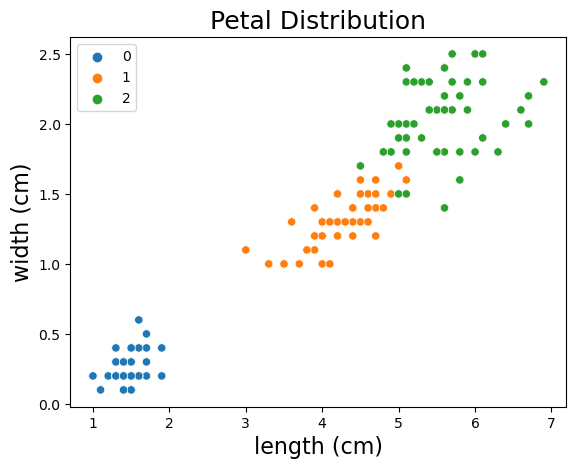

In [9]:
# Creating graphic for Petal Distribution

sns.scatterplot(x=x[:,2],y=x[:,3], hue=y, palette='tab10')
plt.xlabel('length (cm)', fontsize=16)
plt.ylabel('width (cm)', fontsize=16)
plt.title('Petal Distribution', fontsize=18)
plt.show()

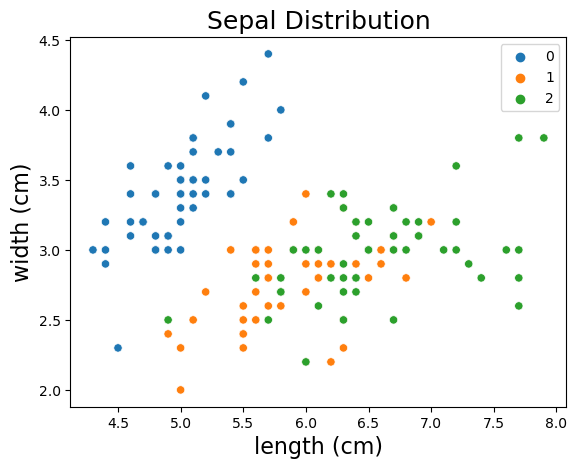

In [10]:
# Creating Graphic for Sepal Distribution

sns.scatterplot(x=x[:,0],y=x[:,1], hue=y, palette='tab10')
plt.xlabel('length (cm)', fontsize=16)
plt.ylabel('width (cm)', fontsize=16)
plt.title('Sepal Distribution', fontsize=18)
plt.show()

# Treating Data

In [11]:
# Categorization

y = keras.utils.to_categorical(y)
y.shape

(150, 3)

In [12]:
# Normalization

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [13]:
# Applying train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

print(x_train.shape, x_test.shape)

(120, 4) (30, 4)


# Model

In [14]:
# Creating model

model = keras.Sequential([keras.layers.InputLayer(input_shape=[4,], name= 'InputLayer'),
                         keras.layers.Dense(512, activation='relu', name= 'HiddenLayer', kernel_initializer=keras.initializers.RandomNormal(seed=142)),
                         keras.layers.Dense(3, activation='softmax', name= 'OutputLayer')
                         ])
model.summary()

C:\Users\Michels\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HiddenLayer (Dense)             │ (None, 512)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,099 (16.01 KB)

 Trainable params: 4,099 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile Model

model.compile(loss='categorical_crossentropy',
             optimizer= 'rmsprop',
             metrics=['categorical_accuracy'])

In [16]:
# Train Model

epochs = 100
historic = model.fit(x_train, y_train, epochs=epochs, validation_split=0.3)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.3997 - loss: 1.0656 - val_categorical_accuracy: 0.6389 - val_loss: 0.9768
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.6908 - loss: 0.9869 - val_categorical_accuracy: 0.6389 - val_loss: 0.9382
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.6830 - loss: 0.9418 - val_categorical_accuracy: 0.6389 - val_loss: 0.9033
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.6948 - loss: 0.9020 - val_categorical_accuracy: 0.6389 - val_loss: 0.8757
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.6830 - loss: 0.8724 - val_categorical_accuracy: 0.6389 - val_loss: 0.8453
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.6908 - loss: 0.8353 - val_categorical_accuracy: 0.6389 - val_loss: 0.8207
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.6830 - loss: 0.8061 - val_c

# Avaliation

In [17]:
historic.history

{'categorical_accuracy': [0.4166666567325592,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6904761791229248,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.6785714030265808,
  0.7023809552192688,
  0.6785714030265808,
  0.7023809552192688,
  0.6785714030265808,
  0.738095223903656,
  0.738095223903656,
  0.738095223903656,
  0.726190447807312,
  0.8690476417541504,
  0.7976190447807312,
  0.8809523582458496,
  0.8452380895614624,
  0.8928571343421936,
  0.9166666865348816,
  0.8571428656578064,
  0.8571428656578064,
  0.8452380895614624,
  0.8809523582458496,
  0.8809523582458496,
  0.9285714030265808,
  0.9047619104385376,
  0.8809523582458496,
  0.9047619104385376,
  0.9047619104385376,
  0.8809523582458496,
  0.9047619104385376,
  0.9166666865348816,
  0.9404761791229248,
  0.94047617

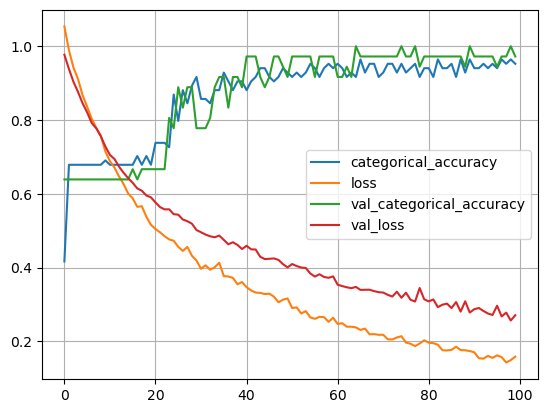

In [18]:
pd.DataFrame(historic.history).plot()
plt.grid()
plt.show()

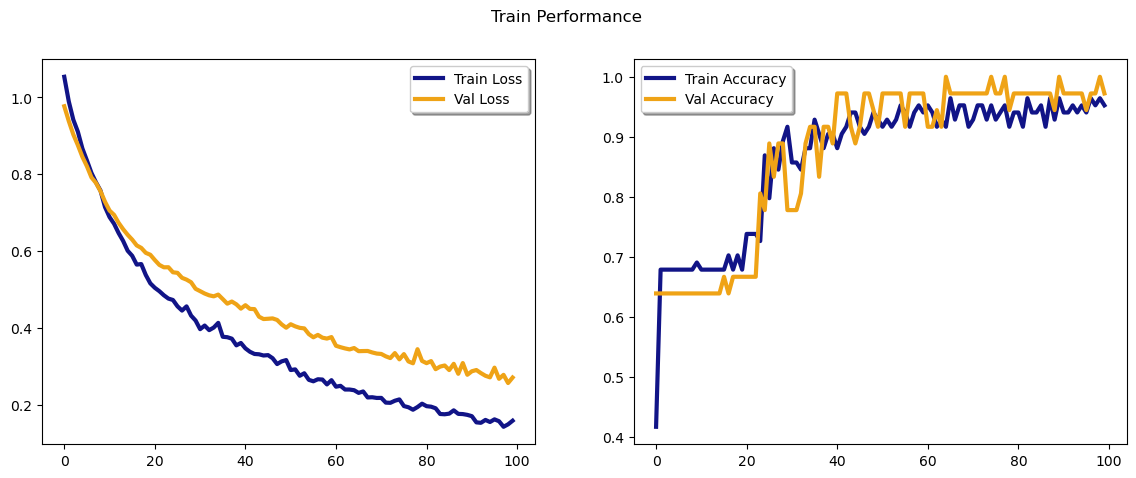

In [19]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(historic.history['loss'], color='#111487', linewidth=3, label="Train Loss")
ax[0].plot(historic.history['val_loss'], color='#EFA316', linewidth=3, label="Val Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(historic.history['categorical_accuracy'], color='#111487', linewidth=3, label="Train Accuracy")
ax[1].plot(historic.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label="Val Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Train Performance')
plt.show()

In [20]:
# Testing

model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.9667 - loss: 0.1593


[0.15927480161190033, 0.9666666388511658]

In [29]:
# Prediction

new_flower = np.array([[0.61, 0.5, 0.69, 0.79]])

model.predict(new_flower)

# Here we can check based on result that the highest probability for the flower type is Virginica around 72%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[7.0766240e-05, 2.7205071e-01, 7.2787845e-01]], dtype=float32)